In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("C:\\Users\\saral\\OneDrive\\Desktop\\Projects\\Project_3\\Zomato data .csv")
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
df['rate']=df['rate'].str.split('/').str[0]
df['rate']=pd.to_numeric(df['rate'])
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
# Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


### There is no NULL value in the dataframe

Text(0.5, 0, 'Type of Restaurant')

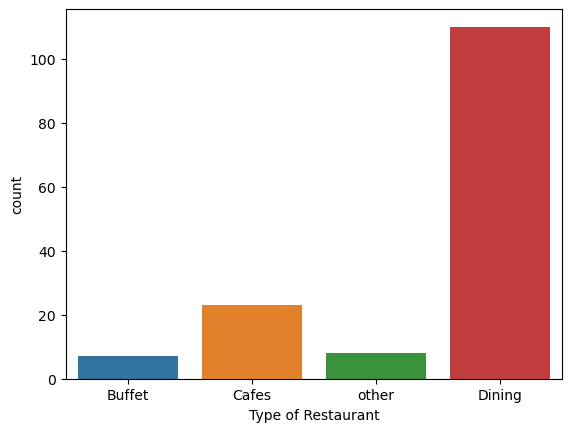

In [6]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Restaurant")

# Conclusion: 
## The majority of the restaurants fall into dining category

Text(0, 0.5, 'Votes')

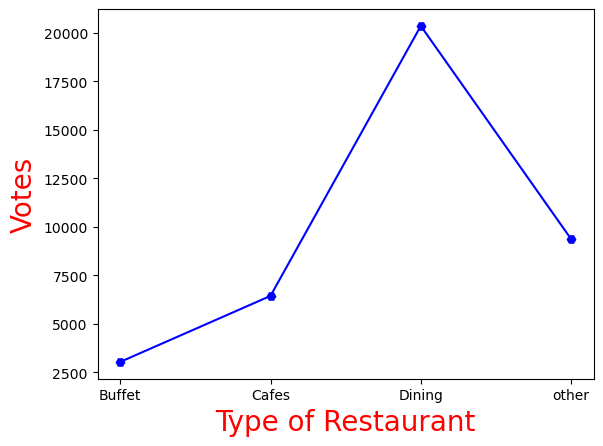

In [21]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="blue",marker="H")
plt.xlabel("Type of Restaurant",c="Red",size=20)
plt.ylabel("Votes",c="Red",size=20)


# Conclusion: 
## Dining restaurants are preferred by a larger number of individuals.

In [22]:
# Determining the restaurant's name that received the maximum votes
max_votes=df['votes'].max()
restaurant_with_max_votes=df.loc[df['votes']==max_votes,'name']
print("Restaurent(s) with maximum votes:")
print(restaurant_with_max_votes)


Restaurent(s) with maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<AxesSubplot:xlabel='online_order', ylabel='count'>

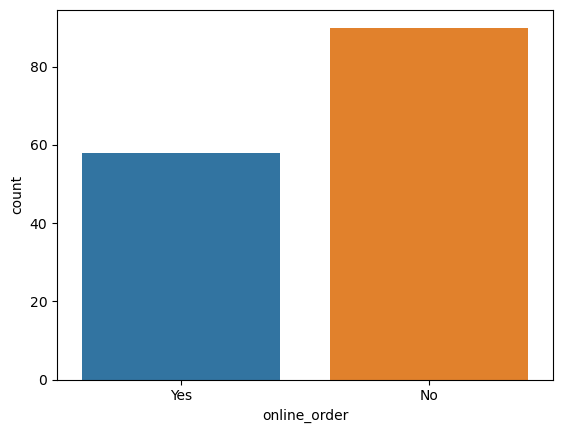

In [24]:
# Online Order 
sns.countplot(x=df['online_order'])

# Conclusion: 
## Majority of restaurants donot accept online orders

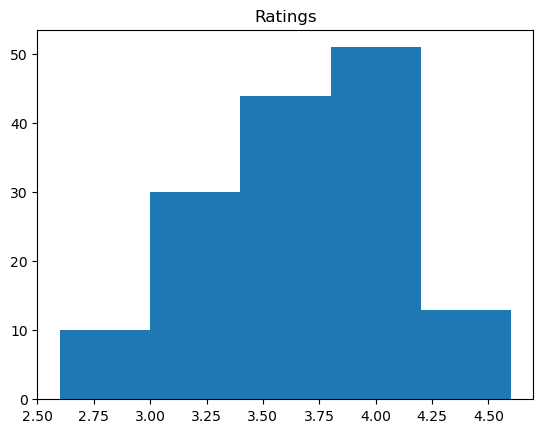

In [25]:
plt.hist(df['rate'],bins=5)
plt.title("Ratings")
plt.show()

# Conclusion: 
## Majority of restaurants received ratings between 3.5 to 4

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='count'>

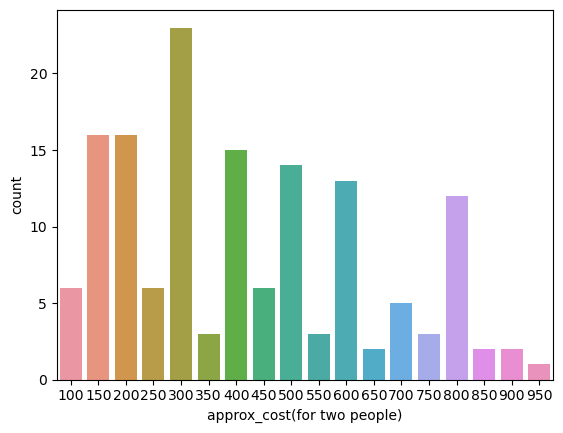

In [26]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

# Conclusion: 
## The majority of couples prefer restaurant with an approximate cost of 300 rupees

<AxesSubplot:xlabel='online_order', ylabel='rate'>

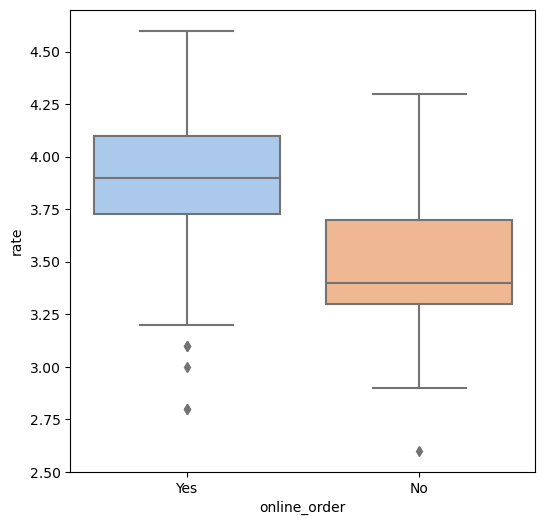

In [30]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df,palette='pastel')

# Conclusion: 
## Offline orders received less ratings as compared to online orders. 

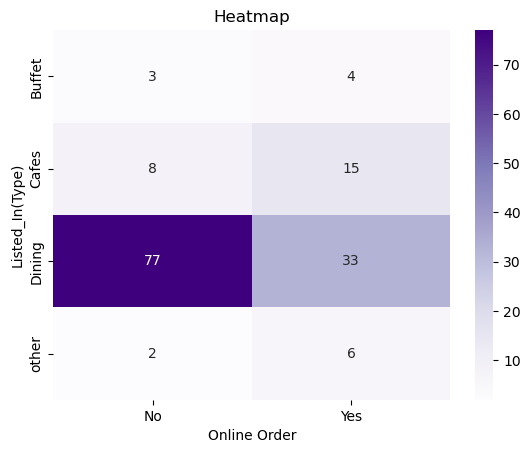

In [64]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="Purples",fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed_In(Type)")
plt.show()

In [65]:
### sns.heatmap(...): Creates a heatmap using Seaborn.
### pivot_table: The data used to create the heatmap. It should be a 2D array or DataFrame.
### annot=True: Annotates each cell with its value.
### cmap="Purples": Sets the colormap of the heatmap.
### fmt='d': Formats the annotations in the heatmap as integers ('d' stands for decimal).

# Conclusion:
### Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.